In [1]:
%matplotlib inline
#import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import colors

In [2]:
ratings = pd.read_table('ml-latest-small/ratings_updated.csv', sep=',')
movies = pd.read_table('ml-latest-small/movies_updated.csv',sep=',')

In [3]:
df = pd.merge(ratings, movies, on='movieId', how='inner')

In [4]:
timedf = df[['timestamp','userId']]

In [5]:
timedf.min()

timestamp    789652009
userId               1
dtype: int64

In [6]:
timedf.max()

timestamp    1476640644
userId              671
dtype: int64

In [7]:
timedf.groupby('userId').size().head(35)

userId
1       20
2       76
3       51
4      204
5      100
6       44
7       88
8      116
9       45
10      46
11      38
12      61
13      53
14      20
15    1700
16      29
17     363
18      51
19     423
20      98
21     162
22     220
23     726
24      21
25      26
26     172
27      23
28      50
29      22
30    1011
31      69
32      48
33     138
34     187
35      20
dtype: int64

In [8]:
timedf.groupby('timestamp').size()

timestamp
789652009      3
828212412      7
828212413      1
828213114      3
828213115     30
828213150     20
828213511      1
828214011     17
828214012     37
828786667      1
829351964     12
829352433     19
829471719     23
829471720     38
829471721     27
829471722     20
829471925      1
829491839      4
829491840      3
829492315     12
829492316     29
829495183      3
829911793      4
829912557     10
829912558     16
830633216      1
830633234      1
830633251      1
830633279      1
831090605      9
              ..
1476551043     1
1476551057     1
1476551062     1
1476551142     1
1476551191     1
1476551238     1
1476551305     1
1476551350     1
1476551370     1
1476552210     1
1476552471     1
1476552477     1
1476552557     1
1476555047     1
1476555871     1
1476562414     1
1476564766     1
1476587644     1
1476616373     1
1476622829     1
1476622832     1
1476622980     1
1476623034     1
1476623070     1
1476623117     1
1476623131     1
1476623217     1
1476

In [9]:
len(timedf.groupby('timestamp').size())

78141

In [10]:
# find number of users who rated a movie per quarter
timedf.groupby((timedf.timestamp - 789652009)/7884000).size()

timestamp
0.000000      3
4.890969      7
4.890970      1
4.891058      3
4.891059     30
4.891063     20
4.891109      1
4.891172     17
4.891172     37
4.963807      1
5.035509     12
5.035569     19
5.050699     23
5.050699     38
5.050699     27
5.050699     20
5.050725      1
5.053251      4
5.053251      3
5.053311     12
5.053311     29
5.053675      3
5.106518      4
5.106614     10
5.106615     16
5.198022      1
5.198024      1
5.198027      1
5.198030      1
5.256037      9
             ..
87.125702     1
87.125704     1
87.125704     1
87.125714     1
87.125721     1
87.125727     1
87.125735     1
87.125741     1
87.125743     1
87.125850     1
87.125883     1
87.125884     1
87.125894     1
87.126210     1
87.126314     1
87.127144     1
87.127443     1
87.130344     1
87.133988     1
87.134807     1
87.134808     1
87.134826     1
87.134833     1
87.134838     1
87.134844     1
87.134846     1
87.134856     1
87.134865     1
87.134867     1
87.137067     1
dtype: int64

In [11]:
# subtract the minimum time to get a start time of 0
tdf = timedf.groupby((timedf.timestamp - 789652009)).size()

In [12]:
tdf

timestamp
0             3
38560403      7
38560404      1
38561105      3
38561106     30
38561141     20
38561502      1
38562002     17
38562003     37
39134658      1
39699955     12
39700424     19
39819710     23
39819711     38
39819712     27
39819713     20
39819916      1
39839830      4
39839831      3
39840306     12
39840307     29
39843174      3
40259784      4
40260548     10
40260549     16
40981207      1
40981225      1
40981242      1
40981270      1
41438596      9
             ..
686899034     1
686899048     1
686899053     1
686899133     1
686899182     1
686899229     1
686899296     1
686899341     1
686899361     1
686900201     1
686900462     1
686900468     1
686900548     1
686903038     1
686903862     1
686910405     1
686912757     1
686935635     1
686964364     1
686970820     1
686970823     1
686970971     1
686971025     1
686971061     1
686971108     1
686971122     1
686971208     1
686971273     1
686971291     1
686988635     1
dtype: int64

In [15]:
# subtract the minimum time from all timestamps so we have a start at time = 0
timedf.ix[:,'time'] = timedf.timestamp - 789652009

C:\Users\sgior\Anaconda2\lib\site-packages\pandas\core\indexing.py:560: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [47]:
timedf.head()

,timestamp,userId,time
0,1260759144,1,471107135
1,851868750,7,62216741
2,1273541953,31,483889944
3,834828440,32,45176431
4,847057202,36,57405193


In [16]:
timedf2 = timedf[['userId','time']]

In [17]:
timedf2.head()

,userId,time
0,1,471107135
1,7,62216741
2,31,483889944
3,32,45176431
4,36,57405193


In [18]:
timedf2.sort_values('userId').head(25)

,userId,time
0,1,471107135
117,1,471107176
165,1,471107196
403,1,471107122
211,1,471107142
259,1,471107178
305,1,471107139
849,1,471107108
84,1,471107173
806,1,471107191


In [19]:
durationdf = timedf2.groupby('userId').max() - timedf2.groupby('userId').min()

In [20]:
durationdf.head(20)

,time
userId,
1,97
2,851
3,71198
4,203560
5,2101
6,1124022
7,2588
8,85187
9,495168


In [21]:
durationdf.max()/60/60/24  # in days

time    5969.787743
dtype: float64

In [22]:
durationdf.max()/60/60/24/365  #in years

time    16.355583
dtype: float64

In [23]:
# which user is the most loyal?
durationdf.loc[durationdf.time == 515789661]

,time
userId,
380,515789661


In [24]:
durationdf.min()  # in seconds

time    29
dtype: int64

In [25]:
# which user is the least loyal?
durationdf.loc[durationdf.time == 29]

,time
userId,
35,29


In [26]:
# What is the average duration of engagement?
durationdf.mean().astype(int)/86400  #in days

time    201.084039
dtype: float64

In [27]:
# convert the duration to number of days and graph
daysdf = durationdf/86400

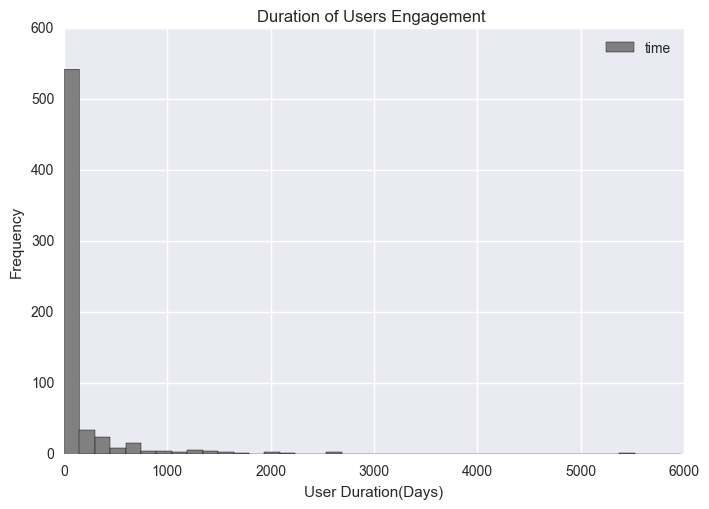

In [28]:
plt.figure(figsize=(8,6))
daysdf.plot.hist(bins=40,color='grey')
ax = plt.subplot(111)

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xlabel('User Duration(Days)')
plt.title('Duration of Users Engagement ')

plt.show()

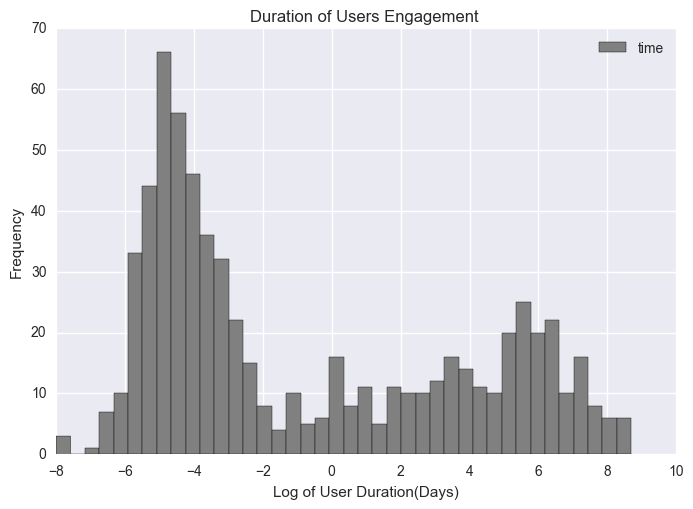

In [29]:
# replot using log of duration
plt.figure(figsize=(8,6))
np.log(daysdf).plot.hist(bins=40,color='grey')
ax = plt.subplot(111)

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xlabel('Log of User Duration(Days)')
plt.title('Duration of Users Engagement ')
plt.savefig('log_duration')
plt.show()

In [ ]:
#plt.plot(vals, bars, 'o')
#plt.hlines(bars, [0], vals, linestyles='dotted', lw=2)

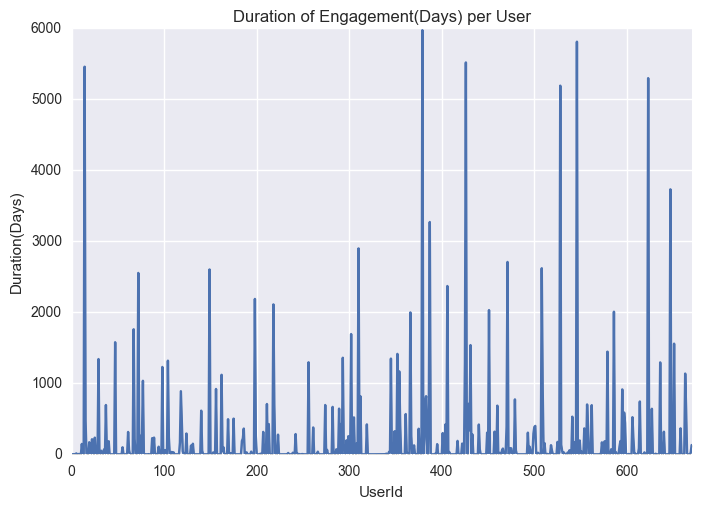

In [38]:
sns.tsplot(daysdf.time)
plt.title('Duration of Engagement(Days) per User')
plt.xlabel('UserId')
plt.ylabel("Duration(Days)")
plt.savefig('duration_per_user')

In [42]:
grouped_by_timestamp = timedf.groupby('timestamp').size()

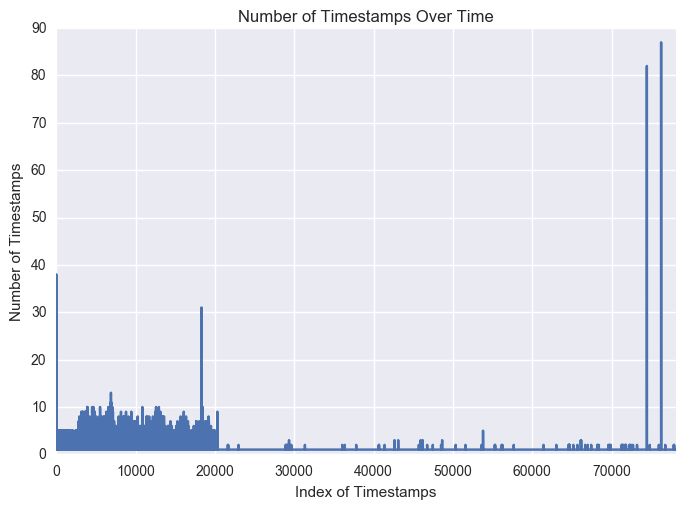

In [48]:
sns.tsplot(grouped_by_timestamp)
plt.title('Number of Timestamps Over Time')
plt.xlabel('Index of Timestamps')
plt.ylabel('Number of Timestamps')
plt.savefig('timestamps_over_time')

In [59]:
# find the timestamp at index 20000 to identify when engagement level dropped
grouped_by_timestamp.index[20000]

1049923830

In [63]:
#convert the timestamp in seconds to years then add to Jan. 1, 1970 to get the actual date
1049923830/60/60/24/365.0

33.29041095890411

Around the end of April in the year of 2003, engagement dropped.

In [ ]:
# if you break the durations into quartiles,approximately 650 of the 671 users have durations of less than 1500 days (~ 4 years).

In [48]:
dflessthanoneyear = daysdf[daysdf.time <= 365]

In [49]:
len(dflessthanoneyear)

588

In [51]:
# number of users that dropped out before the end of one year
len(daysdf[daysdf.time <= 365])

588

In [58]:
# number of users that stayed for at least one year and up to 2 years
len(daysdf[(daysdf.time <= 730) & (daysdf.time > 365)])

36

In [59]:
# number of users that stayed for at least 2 years and up to 3 years
len(daysdf[(daysdf.time <= 1095) & (daysdf.time > 730) ])

10

In [61]:
# number of users that stayed for at least 3 years and up to 4 years
len(daysdf[(daysdf.time <= 1460) & (daysdf.time > 1095) ])

13

In [62]:
# number of users that stayed for at least 4 years and up to 5 years
len(daysdf[(daysdf.time <= 1825) & (daysdf.time > 1460) ])

5

In [64]:
# number of users that stayed for more than 5 years
len(daysdf[daysdf.time > 1825])

19